In [1]:
import pandas as pd
import numpy as np
import os
import plotly as plt
import matplotlib.pyplot as plt
import pandas_profiling as ppf
import seaborn as sns
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.figure_factory as ff
from sklearn.impute import SimpleImputer
%matplotlib inline


In [2]:
nba2012=pd.read_csv(r"C:\Users\prath\Downloads\Compressed\achou-nba-draft-combine-measurements\2012_nba_draft_combine.csv")
nba2013=pd.read_csv(r"C:\Users\prath\Downloads\Compressed\achou-nba-draft-combine-measurements\2013_nba_draft_combine.csv")
nba2014=pd.read_csv(r"C:\Users\prath\Downloads\Compressed\achou-nba-draft-combine-measurements\2014_nba_draft_combine.csv")
nba2015=pd.read_csv(r"C:\Users\prath\Downloads\Compressed\achou-nba-draft-combine-measurements\2015_nba_draft_combine.csv")
nba2016=pd.read_csv(r"C:\Users\prath\Downloads\Compressed\achou-nba-draft-combine-measurements\2016_nba_draft_combine.csv")

In [3]:
nba=pd.concat([nba2012,nba2013,nba2014,nba2015,nba2016],ignore_index=True,axis=0)

In [4]:
nba

Unnamed: 0            Player  Year  Draft pick  Height (No Shoes)  \
0             0    Andre Drummond  2012         9.0              81.75   
1             1  Andrew Nicholson  2012        19.0              80.50   
2             2     Anthony Davis  2012         1.0              81.25   
3             3   Arnett Moultrie  2012        27.0              81.50   
4             4     Austin Rivers  2012        10.0              75.50   
..          ...               ...   ...         ...                ...   
301          56     Troy Williams  2016         NaN              77.75   
302          57        Tyler Ulis  2016        34.0              68.75   
303          58      Wade Baldwin  2016        17.0              74.50   
304          59      Wayne Selden  2016         NaN              76.25   
305          60           Zhou Qi  2016        43.0              85.25   

     Height (With Shoes)  Wingspan  Standing reach  Vertical (Max)  \
0                  83.75     90.25           109.5            33.5   
1                  81.50     88.00           107.0            30.5   
2                  82.50     89.50           108.0             NaN   
3                  82.75     86.25           106.5            37.5   
4                  77.00     79.25            96.5            37.5   
..                   ...       ...             ...             ...   
301                78.75     80.25           102.0            36.0   
302                70.00     74.00            88.5            38.0   
303                76.00     83.25           100.0            38.0   
304                77.75     82.50           101.0             NaN   
305                86.25     91.75           112.5            32.0   

     Vertical (Max Reach)  Vertical (No Step)  Vertical (No Step Reach)  \
0                   143.0                31.5                     141.0   
1                   137.5                28.5                     135.5   
2                     NaN                 NaN                       NaN   
3                   144.0                33.5                     140.0   
4                   134.0                32.5                     129.0   
..                    ...                 ...                       ...   
301                 138.0                30.0                     132.0   
302                 126.5                32.5                     121.0   
303                 138.0                32.5                     132.5   
304                   NaN                 NaN                       NaN   
305                 144.5                31.5                     144.0   

     Weight  Body Fat  Hand (Length)  Hand (Width)  Bench  Agility  Sprint  
0     279.0       7.5           9.50          9.50   10.0    10.83    3.39  
1     234.0       7.6          10.00         10.75   10.0    11.89    3.67  
2     222.0       7.9           9.00          8.50    NaN      NaN     NaN  
3     233.0       7.7           9.25          9.25   10.0    11.32    3.22  
4     203.0       6.2           8.50         10.00    1.0    11.54    3.32  
..      ...       ...            ...           ...    ...      ...     ...  
301   218.0      10.0           8.25          9.25    NaN    10.72    3.35  
302   149.0       5.2           7.50          7.50    NaN    10.80    3.20  
303   202.0       5.2           9.00          9.75    NaN    10.45    3.19  
304   232.0       7.3           9.00          9.25    NaN      NaN     NaN  
305   218.0       4.9           9.25          9.50    NaN    11.27    3.46  

[306 rows x 19 columns]

In [5]:
nba.head()

Unnamed: 0            Player  Year  Draft pick  Height (No Shoes)  \
0           0    Andre Drummond  2012         9.0              81.75   
1           1  Andrew Nicholson  2012        19.0              80.50   
2           2     Anthony Davis  2012         1.0              81.25   
3           3   Arnett Moultrie  2012        27.0              81.50   
4           4     Austin Rivers  2012        10.0              75.50   

   Height (With Shoes)  Wingspan  Standing reach  Vertical (Max)  \
0                83.75     90.25           109.5            33.5   
1                81.50     88.00           107.0            30.5   
2                82.50     89.50           108.0             NaN   
3                82.75     86.25           106.5            37.5   
4                77.00     79.25            96.5            37.5   

   Vertical (Max Reach)  Vertical (No Step)  Vertical (No Step Reach)  Weight  \
0                 143.0                31.5                     141.0   279.0   
1                 137.5                28.5                     135.5   234.0   
2                   NaN                 NaN                       NaN   222.0   
3                 144.0                33.5                     140.0   233.0   
4                 134.0                32.5                     129.0   203.0   

   Body Fat  Hand (Length)  Hand (Width)  Bench  Agility  Sprint  
0       7.5           9.50          9.50   10.0    10.83    3.39  
1       7.6          10.00         10.75   10.0    11.89    3.67  
2       7.9           9.00          8.50    NaN      NaN     NaN  
3       7.7           9.25          9.25   10.0    11.32    3.22  
4       6.2           8.50         10.00    1.0    11.54    3.32

In [6]:
nba=nba.iloc[:,1:]

In [7]:
nba.head()

Player  Year  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    Andre Drummond  2012         9.0              81.75                83.75   
1  Andrew Nicholson  2012        19.0              80.50                81.50   
2     Anthony Davis  2012         1.0              81.25                82.50   
3   Arnett Moultrie  2012        27.0              81.50                82.75   
4     Austin Rivers  2012        10.0              75.50                77.00   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     90.25           109.5            33.5                 143.0   
1     88.00           107.0            30.5                 137.5   
2     89.50           108.0             NaN                   NaN   
3     86.25           106.5            37.5                 144.0   
4     79.25            96.5            37.5                 134.0   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0                31.5                     141.0   279.0       7.5   
1                28.5                     135.5   234.0       7.6   
2                 NaN                       NaN   222.0       7.9   
3                33.5                     140.0   233.0       7.7   
4                32.5                     129.0   203.0       6.2   

   Hand (Length)  Hand (Width)  Bench  Agility  Sprint  
0           9.50          9.50   10.0    10.83    3.39  
1          10.00         10.75   10.0    11.89    3.67  
2           9.00          8.50    NaN      NaN     NaN  
3           9.25          9.25   10.0    11.32    3.22  
4           8.50         10.00    1.0    11.54    3.32

In [8]:
nba.shape

(306, 18)

# Data Cleaning With analysing Features
Handing Missing/NaN Values

In [9]:
imputer_mean = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imputer_median = SimpleImputer(missing_values = np.nan,
                        strategy ='median')
imputer_mode= SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')

In [10]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    306 non-null    object 
 1   Year                      306 non-null    int64  
 2   Draft pick                215 non-null    float64
 3   Height (No Shoes)         306 non-null    float64
 4   Height (With Shoes)       306 non-null    float64
 5   Wingspan                  306 non-null    float64
 6   Standing reach            306 non-null    float64
 7   Vertical (Max)            257 non-null    float64
 8   Vertical (Max Reach)      257 non-null    float64
 9   Vertical (No Step)        258 non-null    float64
 10  Vertical (No Step Reach)  258 non-null    float64
 11  Weight                    305 non-null    float64
 12  Body Fat                  305 non-null    float64
 13  Hand (Length)             306 non-null    float64
 14  Hand (Widt

In [11]:
nba.isnull().sum()

Player                        0
Year                          0
Draft pick                   91
Height (No Shoes)             0
Height (With Shoes)           0
Wingspan                      0
Standing reach                0
Vertical (Max)               49
Vertical (Max Reach)         49
Vertical (No Step)           48
Vertical (No Step Reach)     48
Weight                        1
Body Fat                      1
Hand (Length)                 0
Hand (Width)                  0
Bench                       157
Agility                      52
Sprint                       53
dtype: int64

# Columns with Null value :-
                 
                 Draft Pick
                Vertical(max)
             Vertical(max reach)
              Vertical(no step)
           Vertical(no step reach)
                    weight
                   body fat
                    bench
                   agility
                    sprint

# Draft Pick column

In [12]:
nba["Draft pick"].unique()


array([ 9., 19.,  1., 27., 10., 33.,  3.,  6., 55., 46.,  4., 42., 35.,
       nan, 22., 30.,  7., 34., 24., 21., 31., 12., 14., 23., 13., 47.,
       39., 44., 51., 49., 59., 29., 11.,  2., 43., 26., 15., 36., 28.,
       37., 38., 58., 16., 18.,  8.,  5., 32., 25., 17., 41., 40., 53.,
       50., 52., 56., 48., 20., 60., 45., 54.])

In [13]:
nba["Draft pick"].describe(include="all")

count    215.000000
mean      29.000000
std       16.127413
min        1.000000
25%       15.000000
50%       29.000000
75%       42.000000
max       60.000000
Name: Draft pick, dtype: float64

In [14]:
nba["Draft pick"].value_counts()

9.0     5
18.0    5
17.0    5
34.0    5
49.0    5
22.0    5
8.0     5
42.0    5
6.0     5
36.0    5
33.0    5
10.0    5
37.0    5
14.0    5
43.0    4
13.0    4
11.0    4
19.0    4
28.0    4
51.0    4
44.0    4
25.0    4
12.0    4
23.0    4
30.0    4
27.0    4
46.0    4
56.0    4
58.0    4
38.0    4
40.0    4
24.0    4
21.0    4
41.0    4
32.0    3
5.0     3
48.0    3
20.0    3
45.0    3
50.0    3
59.0    3
26.0    3
2.0     3
29.0    3
39.0    3
47.0    3
31.0    3
7.0     3
15.0    3
35.0    3
4.0     3
55.0    3
3.0     3
16.0    2
52.0    2
1.0     1
53.0    1
60.0    1
54.0    1
Name: Draft pick, dtype: int64

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Draft pick', ylabel='count'>

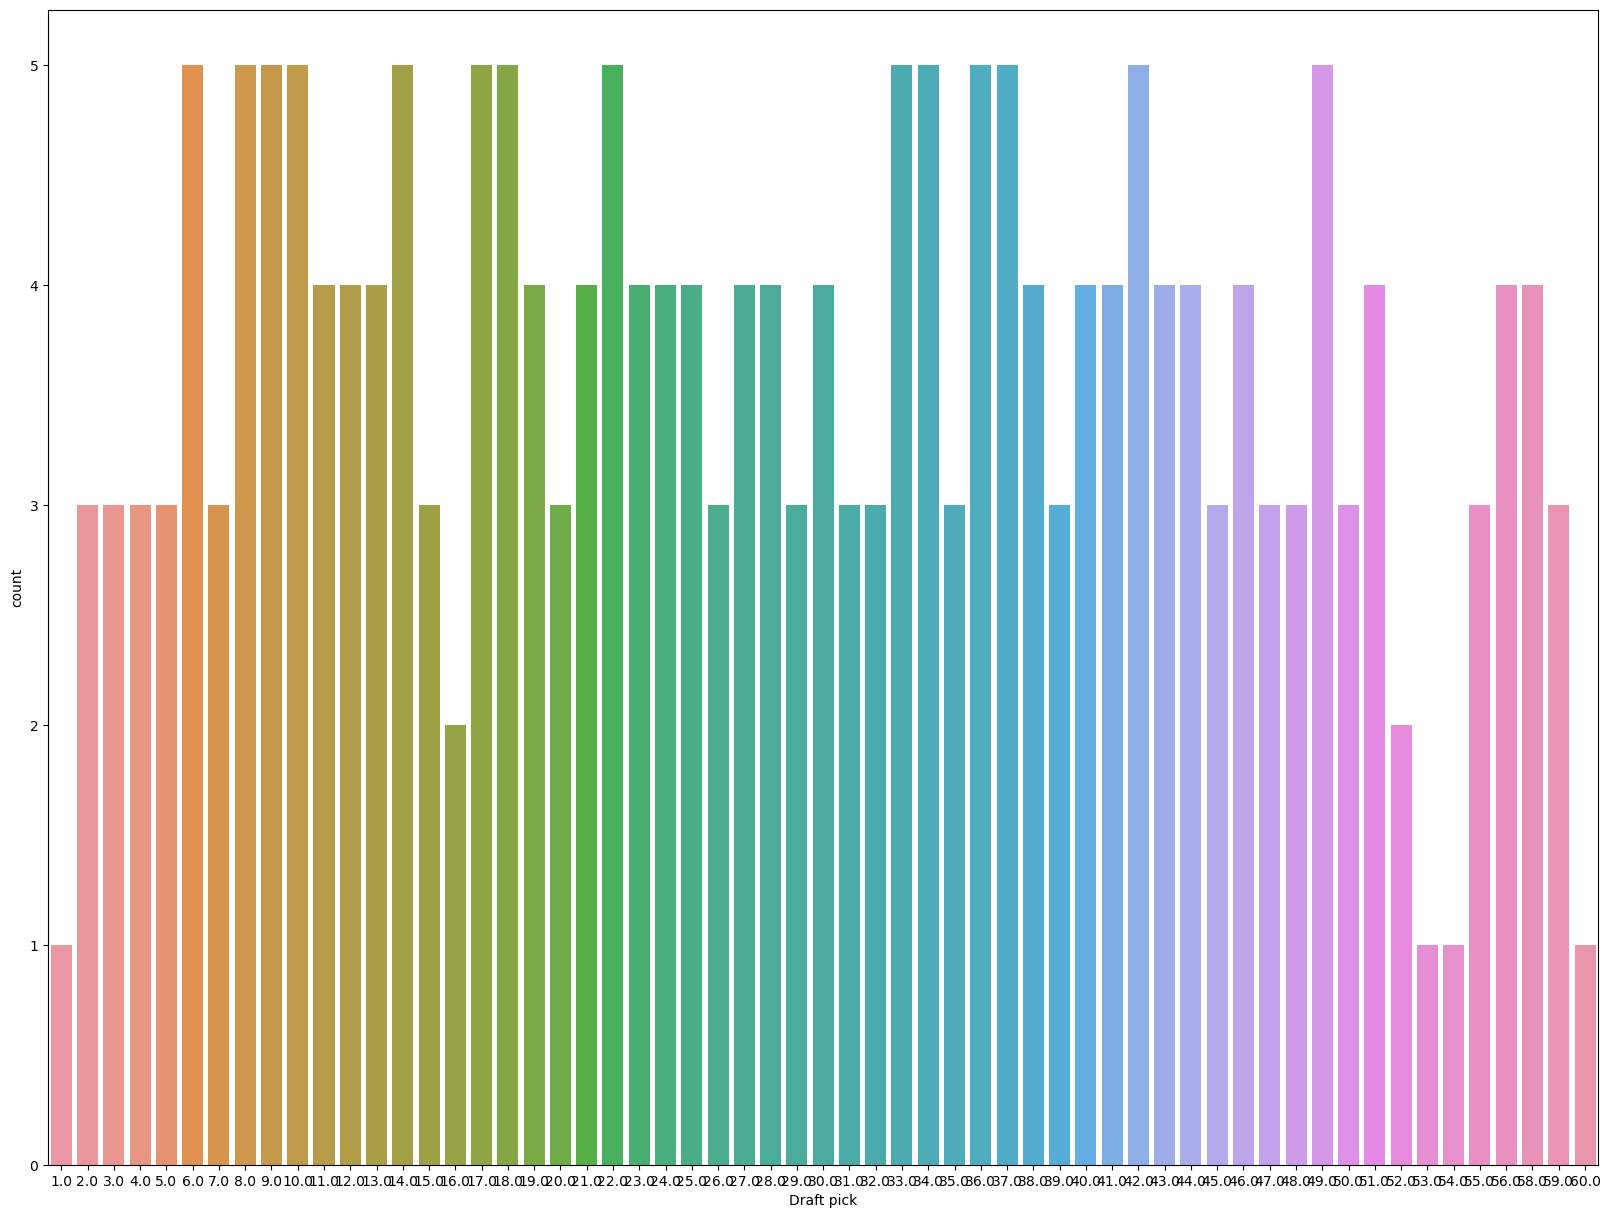

In [15]:
plt.figure(figsize=(20,15))
sns.countplot("Draft pick",data=nba)

In [16]:
nba["Draft pick"]=imputer_mean.fit_transform(np.array(nba["Draft pick"]).reshape(-1,1))

In [17]:
nba["Draft pick"].isnull().sum().any()

False

In [18]:
nba["Draft pick"]=nba["Draft pick"].astype(int)

# Vertical (max) Column

In [19]:
nba['Vertical (Max)'].unique()

array([33.5, 30.5,  nan, 37.5, 32.5, 39. , 39.5, 41.5, 37. , 33. , 34. ,
       31. , 29.5, 36.5, 34.5, 40. , 38. , 30. , 35. , 31.5, 40.5, 35.5,
       38.5, 36. , 42. , 32. , 29. , 41. , 44. , 43.5, 28.5, 25. , 43. ,
       28. ])

In [20]:
type(nba['Vertical (Max)'][0])

numpy.float64

In [21]:
nba['Vertical (Max)'].describe(include='all')

count    257.000000
mean      35.638132
std        3.595704
min       25.000000
25%       33.000000
50%       35.500000
75%       38.000000
max       44.000000
Name: Vertical (Max), dtype: float64

In [22]:
nba["Vertical (Max)"].value_counts()

35.5    22
36.5    16
34.5    15
37.5    15
36.0    13
38.0    12
37.0    12
34.0    12
32.5    11
31.0    10
33.5    10
39.5    10
35.0     9
40.5     9
31.5     8
38.5     8
32.0     8
29.5     7
33.0     6
40.0     6
41.5     6
29.0     4
44.0     3
28.5     3
43.0     3
43.5     3
30.0     3
41.0     3
30.5     3
39.0     3
42.0     2
25.0     1
28.0     1
Name: Vertical (Max), dtype: int64

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Vertical (Max)', ylabel='count'>

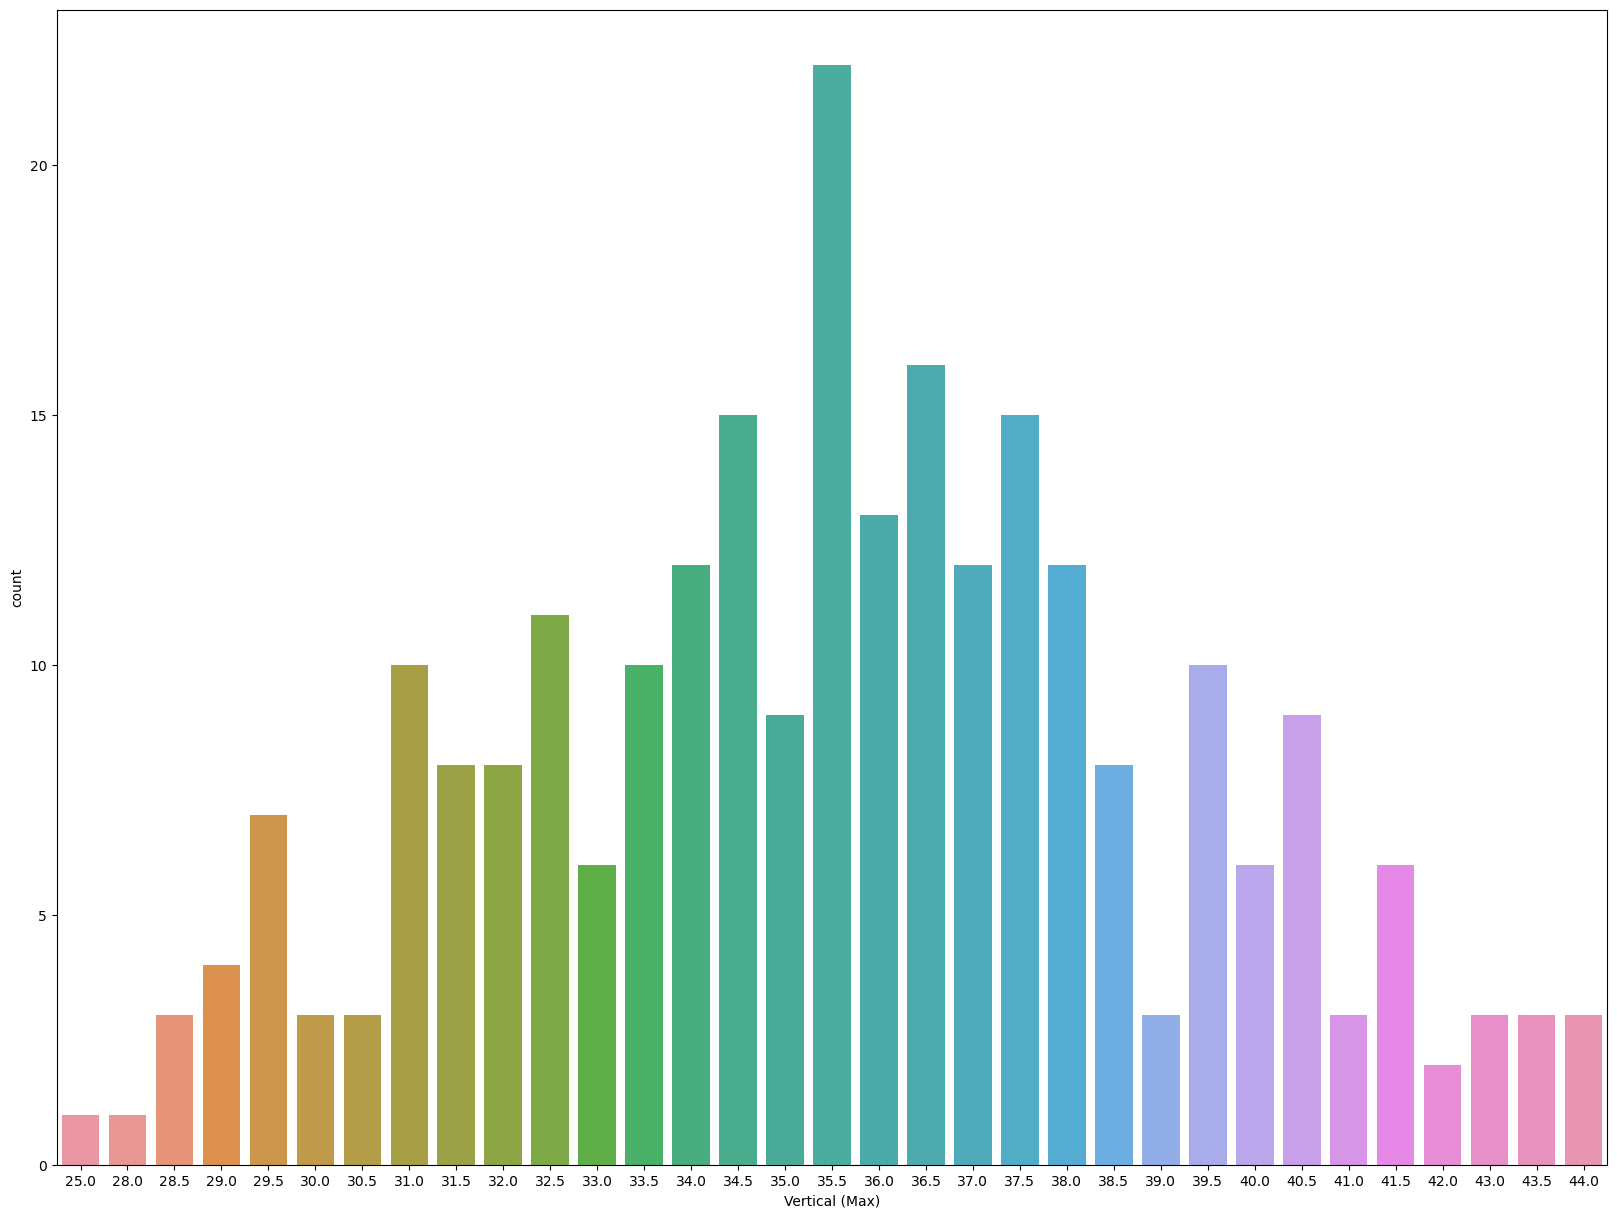

In [23]:
plt.figure(figsize=(20,15))
sns.countplot("Vertical (Max)",data=nba)

In [24]:
# using mode
nba["Vertical (Max)"]=imputer_mode.fit_transform(np.array(nba["Vertical (Max)"]).reshape(-1,1))

C:\Users\prath\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [25]:
px.pie(nba,values=nba["Vertical (Max)"].value_counts(),names=nba["Vertical (Max)"].unique())

# Vertical (Max reach) Column


In [26]:
nba["Vertical (Max Reach)"].unique()

array([143. , 137.5,   nan, 144. , 134. , 141. , 139. , 135. , 138. ,
       132. , 141.5, 125.5, 136.5, 140. , 142. , 134.5, 129. , 133. ,
       135.5, 137. , 140.5, 146. , 139.5, 138.5, 145.5, 143.5, 127. ,
       129.5, 142.5, 145. , 136. , 144.5, 131.5, 130.5, 133.5, 126.5,
       128.5, 132.5, 127.5, 128. , 147. ])

In [27]:
nba["Vertical (Max Reach)"].describe()

count    257.000000
mean     138.093385
std        4.220605
min      125.500000
25%      135.000000
50%      138.500000
75%      141.500000
max      147.000000
Name: Vertical (Max Reach), dtype: float64

In [28]:
nba["Vertical (Max Reach)"].value_counts()

138.0    20
139.5    14
141.5    13
138.5    12
134.0    12
141.0    12
136.5    12
142.0    12
144.0    11
139.0    11
137.5    11
140.5     9
135.0     9
140.0     8
134.5     8
137.0     7
143.5     6
142.5     6
133.5     6
136.0     6
143.0     6
135.5     5
133.0     5
132.0     5
144.5     4
132.5     3
145.0     3
145.5     2
127.0     2
129.5     2
129.0     2
128.0     2
131.5     2
130.5     2
126.5     2
127.5     1
146.0     1
128.5     1
125.5     1
147.0     1
Name: Vertical (Max Reach), dtype: int64

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Vertical (Max Reach)', ylabel='count'>

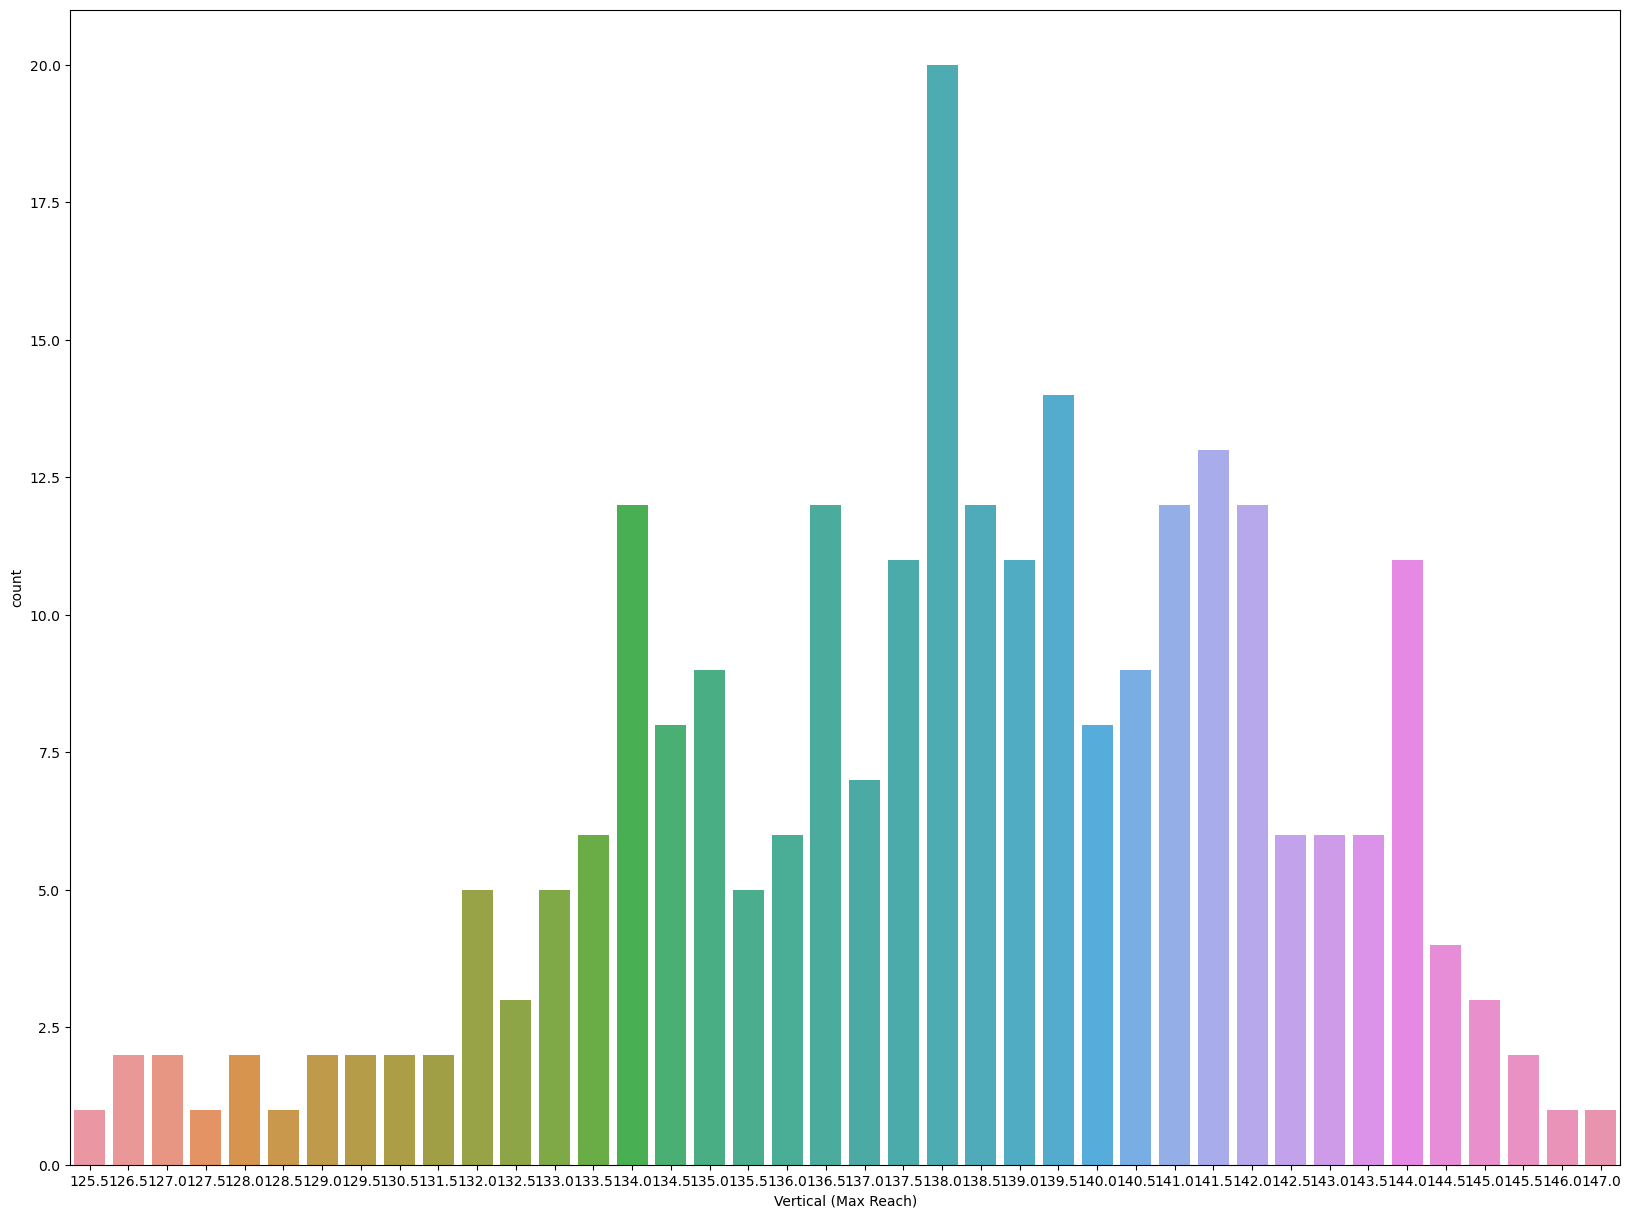

In [29]:
plt.figure(figsize=(20,15))
sns.countplot("Vertical (Max Reach)",data=nba)

In [30]:
# using mean
nba["Vertical (Max Reach)"]=imputer_mean.fit_transform(np.array(nba["Vertical (Max Reach)"]).reshape(-1,1))

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Vertical (Max Reach)', ylabel='count'>

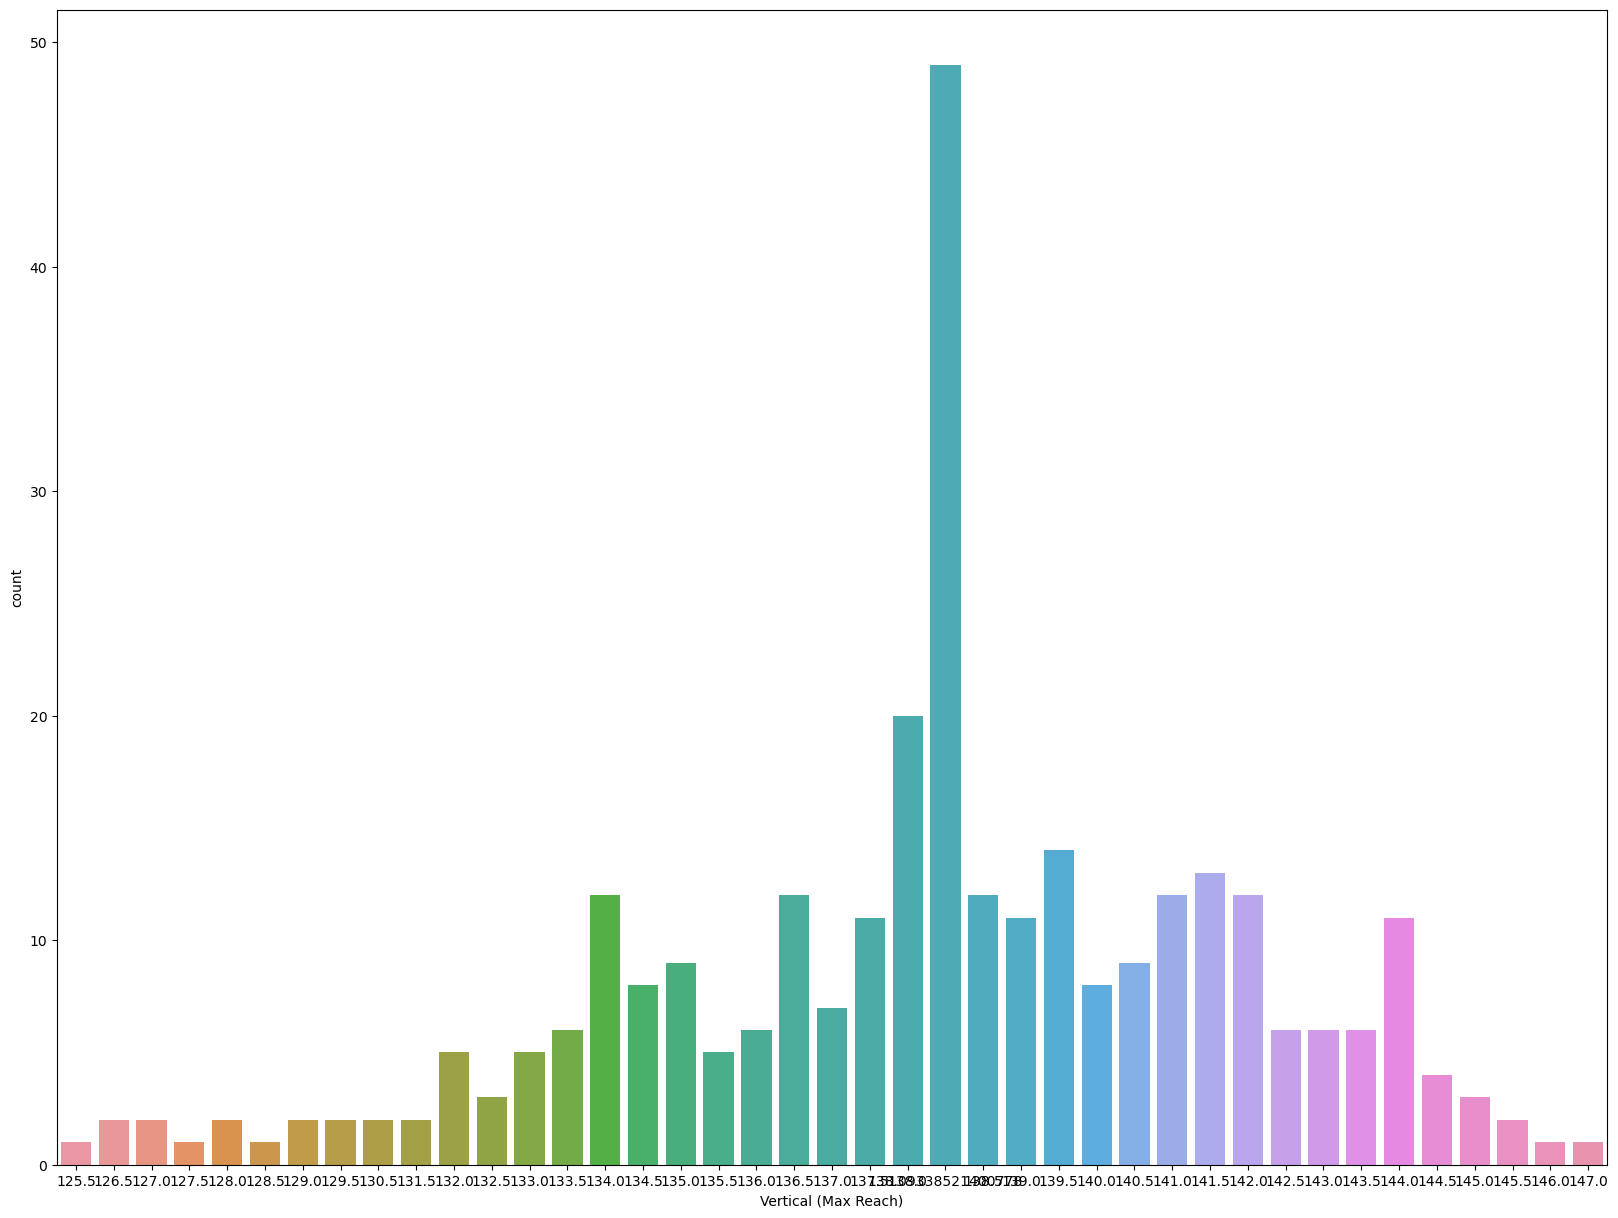

In [31]:
plt.figure(figsize=(20,15))
sns.countplot("Vertical (Max Reach)",data=nba)

In [32]:
nba["Vertical (Max Reach)"].isna().any()

False

# Vertical (No Step Reach) Column

In [33]:
nba["Vertical (No Step Reach)"].unique()

array([141. , 135.5,   nan, 140. , 129. , 138.5, 133. , 130. , 129.5,
       134. , 127.5, 132.5, 139.5, 142. , 134.5, 131. , 122. , 136. ,
       130.5, 135. , 133.5, 137.5, 128.5, 125.5, 127. , 138. , 128. ,
       136.5, 121.5, 131.5, 122.5, 132. , 137. , 141.5, 140.5, 126.5,
       125. , 124. , 123.5, 139. , 126. , 124.5, 121. , 143. , 119. ,
       142.5, 144. ])

In [34]:
nba["Vertical (No Step Reach)"].value_counts()

131.0    15
134.5    14
133.0    14
132.5    12
132.0    10
129.0    10
135.0    10
136.0    10
131.5    10
129.5     9
138.0     9
128.0     8
133.5     8
135.5     8
137.0     8
134.0     7
127.5     6
136.5     6
130.0     6
138.5     6
137.5     6
128.5     6
140.0     6
127.0     6
130.5     5
126.5     5
139.0     4
139.5     4
125.5     3
124.5     3
123.5     3
121.0     2
124.0     2
125.0     2
141.0     2
140.5     2
122.5     2
141.5     1
121.5     1
126.0     1
122.0     1
142.0     1
143.0     1
119.0     1
142.5     1
144.0     1
Name: Vertical (No Step Reach), dtype: int64

In [35]:
nba["Vertical (No Step Reach)"]=imputer_mean.fit_transform(np.array(nba["Vertical (No Step Reach)"]).reshape(-1,1))

In [36]:
nba["Vertical (No Step)"]=imputer_mean.fit_transform(np.array(nba["Vertical (No Step)"]).reshape(-1,1))

In [37]:
nba["Weight"]=imputer_mean.fit_transform(np.array(nba["Weight"]).reshape(-1,1))
nba["Body Fat"]=imputer_mean.fit_transform(np.array(nba["Body Fat"]).reshape(-1,1))

In [38]:
nba["Bench"].describe()

count    149.000000
mean       9.463087
std        4.728470
min        1.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       21.000000
Name: Bench, dtype: float64

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Bench', ylabel='count'>

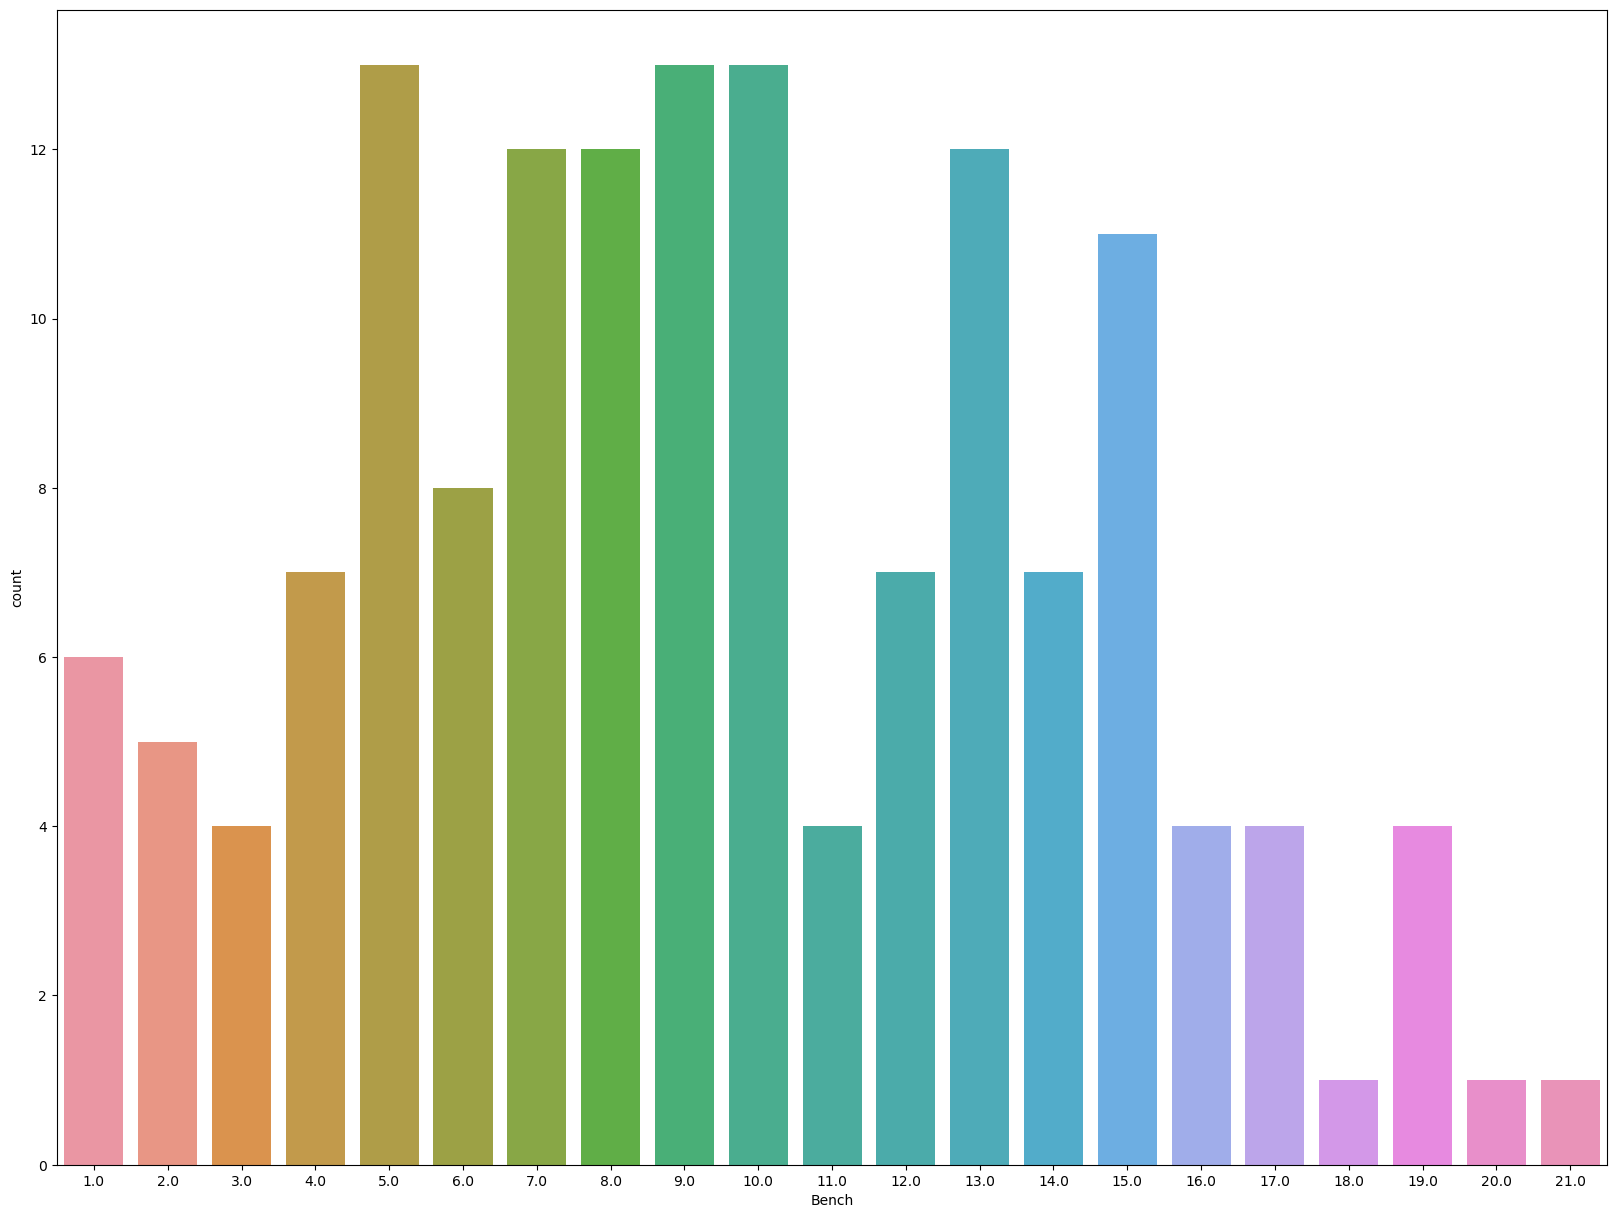

In [39]:
plt.figure(figsize=(20,15))
sns.countplot("Bench",data=nba)

In [40]:
# Because this column have 50 % data null s we drop this column

nba.drop(columns=["Bench"],inplace=True)

In [41]:
nba["Agility"].describe()

count    254.000000
mean      11.293307
std        0.547450
min       10.190000
25%       10.870000
50%       11.245000
75%       11.617500
max       12.940000
Name: Agility, dtype: float64

In [42]:
#using mean
nba["Agility"]=imputer_mean.fit_transform(np.array(nba["Agility"]).reshape(-1,1))


In [43]:
nba["Sprint"].describe()

count    253.000000
mean       3.322292
std        0.126877
min        3.020000
25%        3.240000
50%        3.300000
75%        3.400000
max        3.810000
Name: Sprint, dtype: float64

In [44]:
# using mean
nba["Sprint"]=imputer_mean.fit_transform(np.array(nba["Sprint"]).reshape(-1,1))

In [45]:
nba.head()

Player  Year  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    Andre Drummond  2012           9              81.75                83.75   
1  Andrew Nicholson  2012          19              80.50                81.50   
2     Anthony Davis  2012           1              81.25                82.50   
3   Arnett Moultrie  2012          27              81.50                82.75   
4     Austin Rivers  2012          10              75.50                77.00   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     90.25           109.5            33.5            143.000000   
1     88.00           107.0            30.5            137.500000   
2     89.50           108.0            35.5            138.093385   
3     86.25           106.5            37.5            144.000000   
4     79.25            96.5            37.5            134.000000   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0           31.500000                141.000000   279.0       7.5   
1           28.500000                135.500000   234.0       7.6   
2           30.127907                132.614341   222.0       7.9   
3           33.500000                140.000000   233.0       7.7   
4           32.500000                129.000000   203.0       6.2   

   Hand (Length)  Hand (Width)    Agility    Sprint  
0           9.50          9.50  10.830000  3.390000  
1          10.00         10.75  11.890000  3.670000  
2           9.00          8.50  11.293307  3.322292  
3           9.25          9.25  11.320000  3.220000  
4           8.50         10.00  11.540000  3.320000

# ------------------------------------------------------------------------------------------------------------------------------------------
# Statistical analysis On data

In [46]:
nba.describe()

Year  Draft pick  Height (No Shoes)  Height (With Shoes)  \
count   306.000000  306.000000         306.000000           306.000000   
mean   2014.003268   29.000000          77.554739            78.837418   
std       1.417683   13.508953           3.329769             3.316056   
min    2012.000000    1.000000          68.250000            69.500000   
25%    2013.000000   21.000000          75.250000            76.750000   
50%    2014.000000   29.000000          77.500000            79.000000   
75%    2015.000000   36.750000          79.937500            81.000000   
max    2016.000000   60.000000          85.250000            86.250000   

         Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
count  306.000000      306.000000      306.000000            306.000000   
mean    82.504085      102.781046       35.616013            138.093385   
std      3.909764        4.906112        3.294621              3.866739   
min     70.000000       88.500000       25.000000            125.500000   
25%     79.812500       99.500000       34.000000            136.500000   
50%     82.750000      103.000000       35.500000            138.093385   
75%     85.750000      106.500000       37.500000            140.875000   
max     92.500000      115.000000       44.000000            147.000000   

       Vertical (No Step)  Vertical (No Step Reach)      Weight    Body Fat  \
count          306.000000                306.000000  306.000000  306.000000   
mean            30.127907                132.614341  213.560656    7.118033   
std              2.780364                  4.268788   23.951120    2.411578   
min             22.500000                119.000000  149.000000    3.200000   
25%             28.500000                130.125000  196.000000    5.300000   
50%             30.127907                132.614341  212.500000    6.500000   
75%             32.000000                135.000000  232.000000    8.400000   
max             38.000000                144.000000  279.000000   16.300000   

       Hand (Length)  Hand (Width)     Agility      Sprint  
count     306.000000    306.000000  306.000000  306.000000  
mean        8.664542      9.208333   11.293307    3.322292  
std         0.734083      1.251597    0.498603    0.115328  
min        -1.000000     -1.000000   10.190000    3.020000  
25%         8.350000      8.750000   10.960000    3.250000  
50%         8.750000      9.250000   11.293307    3.322292  
75%         9.000000      9.750000   11.550000    3.380000  
max        10.000000     11.750000   12.940000    3.810000

In [47]:
nba.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

In [48]:
nba.iplot()

In [49]:
plt.figure(figsize=(20,15))
nba.iplot(kind="box")

<Figure size 2000x1500 with 0 Axes>

# Year wise player picking

In [50]:
plt.figure(figsize=(10,5))
px.bar(nba,x="Year",y="Draft pick")

<Figure size 1000x500 with 0 Axes>

In [51]:
## every year the player picking goes high
## in 2016 the drafting is more as compare to 2012,13,14, and 15

# Height without Shoes and Draft picking of player

In [52]:
plt.figure(figsize=(15,10))
px.scatter(nba,x="Height (With Shoes)",y="Draft pick",
          color="Player")

<Figure size 1500x1000 with 0 Axes>

In [53]:
## As The Height Of Player Increases The Draft Picking Is sme how Constant

# Height with No Shoes and with shoes

In [54]:
plt.figure(figsize=(15,10))
px.scatter(nba,x="Height (With Shoes)",y="Height (No Shoes)",
          color="Player")

<Figure size 1500x1000 with 0 Axes>

In [55]:
## As The Height without shoes increases the height with shoes also increases
## where as there is a small outlier at height with shoes 81

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dd714130>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dd6ffbe0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f3dd7147c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dd6ff3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dd6ff220>],
 'means': []}

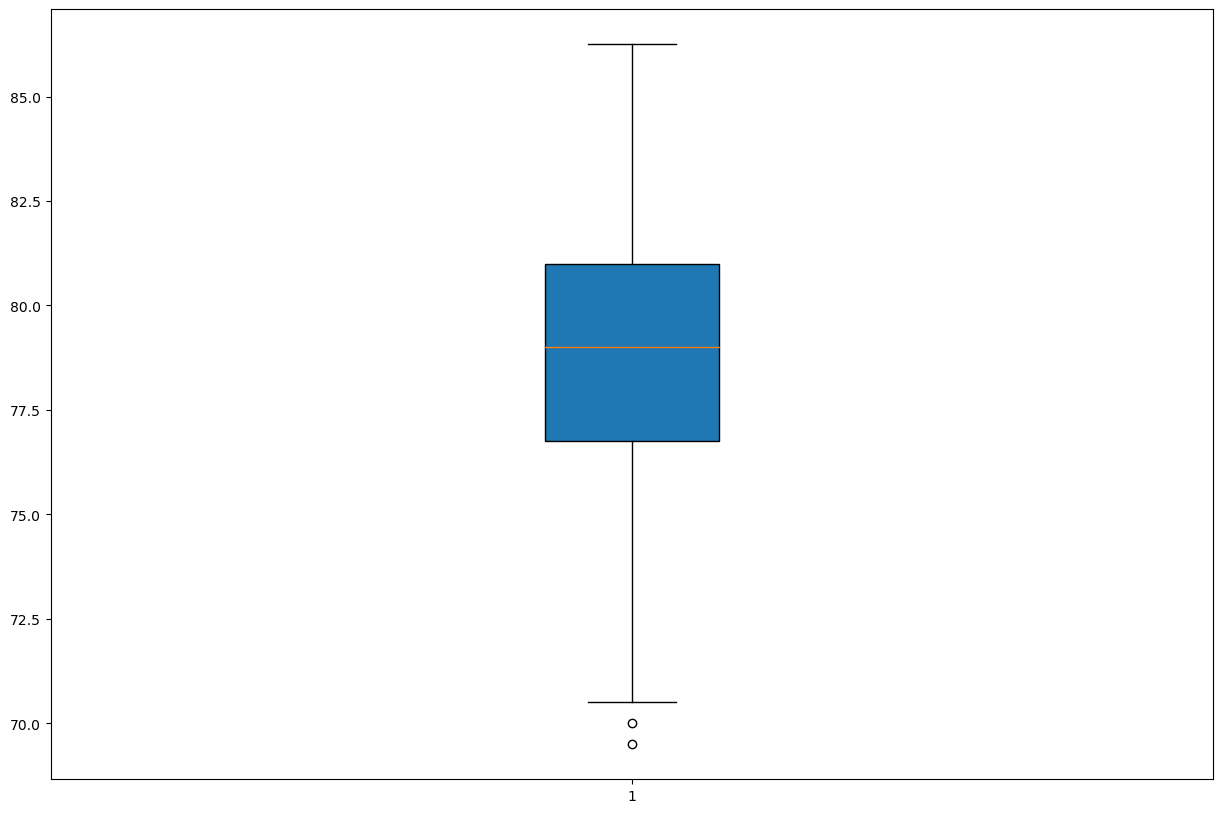

In [56]:
plt.figure(figsize=(15,10))
plt.boxplot(nba["Height (With Shoes)"],patch_artist=True)

In [57]:
# there are two outliers in  the series in minimum extream

In [58]:
plt.figure(figsize=(15,10))
px.scatter(nba,x="Height (With Shoes)",y="Wingspan",
          color="Player")

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:xlabel='Height (With Shoes)', ylabel='Wingspan'>

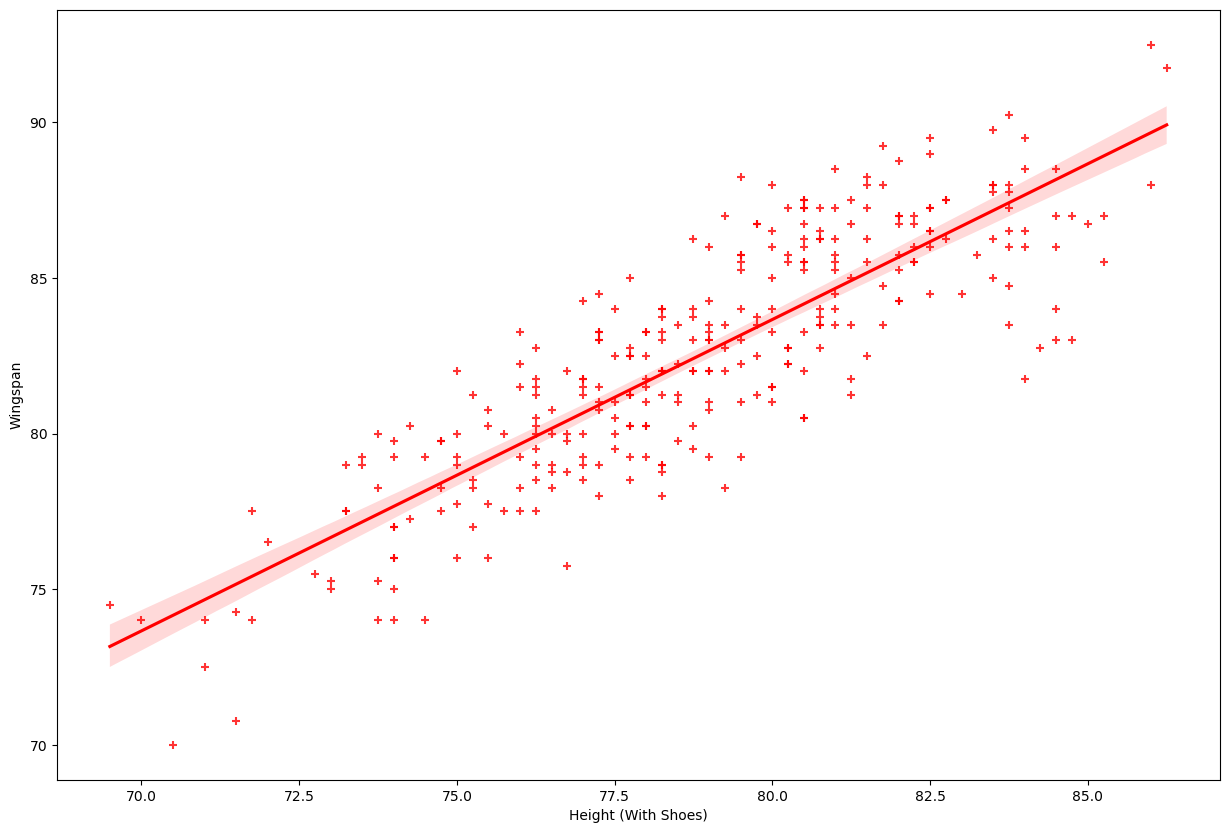

In [59]:
plt.figure(figsize=(15,10))
sns.regplot(x="Height (With Shoes)", y= "Wingspan",data=nba,scatter=True, fit_reg=True,color="red",marker="+")

In [60]:

## Graph shows that the Wingspan is linearly depending on Height 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dd8847c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dd8842b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f3dd884e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dd349400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dd349700>],
 'means': []}

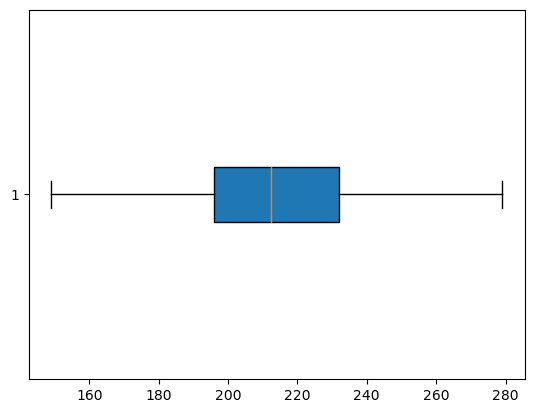

In [61]:
plt.boxplot(nba["Weight"],vert=False,patch_artist=True)

In [62]:
## No outlier in weight column
## as the Height of player increases the weight also increases

# Weight and Body Fat Analysis as per height

In [63]:
plt.figure(figsize=(15,10))
px.scatter(nba,y="Body Fat",x="Weight",
          )

<Figure size 1500x1000 with 0 Axes>

In [64]:
plt.figure(figsize=(15,10))
px.line(nba,x="Height (No Shoes)",y=["Weight","Body Fat"],labels={"x":"height","y":"Weight and Fat"},title="Weight VS Body Fat")

<Figure size 1500x1000 with 0 Axes>

In [65]:
## As the Height Increases the Weight is always goes high
## But the Body Fat is somewhere Constant

In [66]:
nba.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

# Agility


<AxesSubplot:xlabel='Height (No Shoes)', ylabel='Agility'>

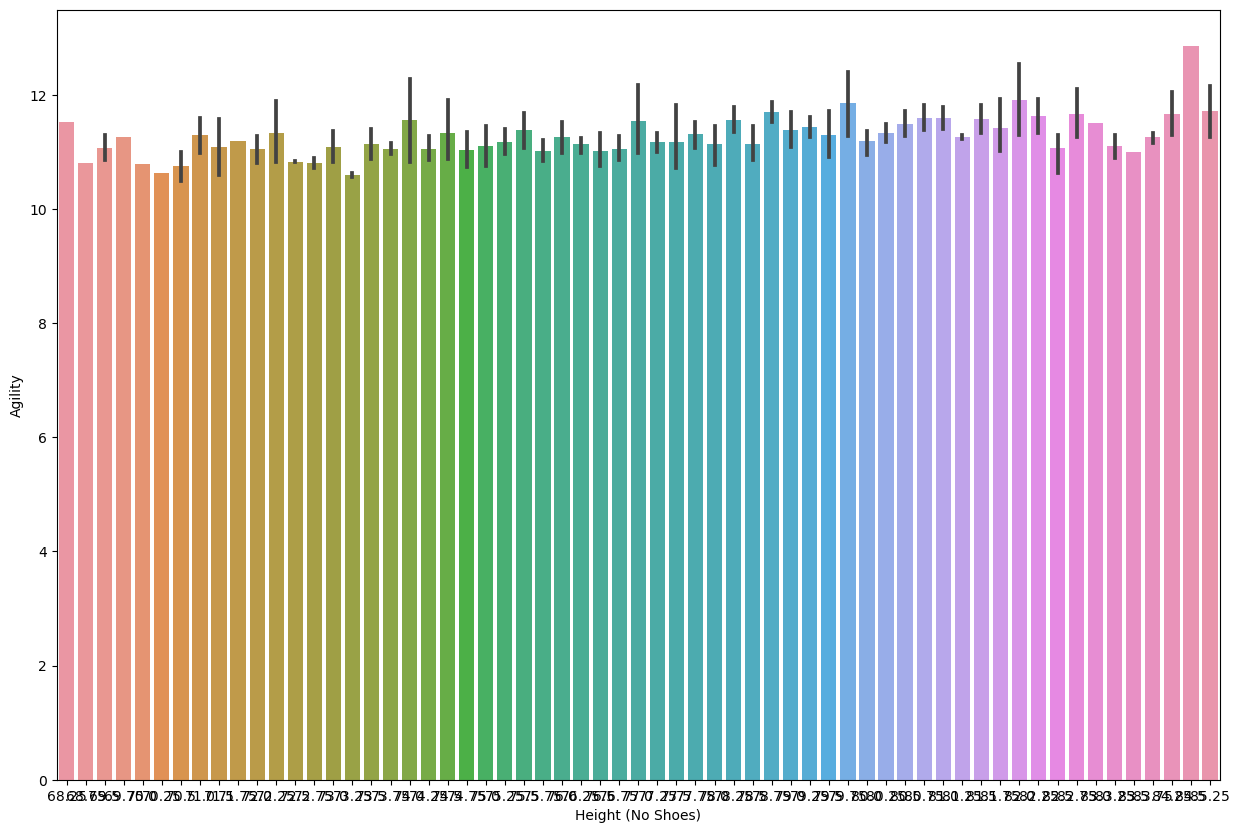

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(x="Height (No Shoes)",y="Agility",data=nba)

In [68]:
plt.figure(figsize=(15,10))
px.scatter(nba,x="Height (No Shoes)",y="Weight",size="Agility",color="Player")

<Figure size 1500x1000 with 0 Axes>

In [69]:
## Graph shows that the Agility is Constant for every player 
## it does nt depend on height or Weight 
## so we may delete this column

In [70]:
new_df=nba.drop("Agility",axis=1)

In [71]:
new_df.head()

Player  Year  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    Andre Drummond  2012           9              81.75                83.75   
1  Andrew Nicholson  2012          19              80.50                81.50   
2     Anthony Davis  2012           1              81.25                82.50   
3   Arnett Moultrie  2012          27              81.50                82.75   
4     Austin Rivers  2012          10              75.50                77.00   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     90.25           109.5            33.5            143.000000   
1     88.00           107.0            30.5            137.500000   
2     89.50           108.0            35.5            138.093385   
3     86.25           106.5            37.5            144.000000   
4     79.25            96.5            37.5            134.000000   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0           31.500000                141.000000   279.0       7.5   
1           28.500000                135.500000   234.0       7.6   
2           30.127907                132.614341   222.0       7.9   
3           33.500000                140.000000   233.0       7.7   
4           32.500000                129.000000   203.0       6.2   

   Hand (Length)  Hand (Width)    Sprint  
0           9.50          9.50  3.390000  
1          10.00         10.75  3.670000  
2           9.00          8.50  3.322292  
3           9.25          9.25  3.220000  
4           8.50         10.00  3.320000

# Sprint Analysis

In [72]:
plt.figure(figsize=(15,10))
px.scatter(new_df,x="Height (No Shoes)",y="Weight",size="Sprint",color="Player")


<Figure size 1500x1000 with 0 Axes>

In [73]:
## As height increases sprint also increases

In [74]:
plt.figure(figsize=(15,10))
px.scatter(new_df,x="Vertical (Max)",y="Height (No Shoes)",color="Player",size="Sprint")

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:xlabel='Vertical (Max)', ylabel='Height (No Shoes)'>

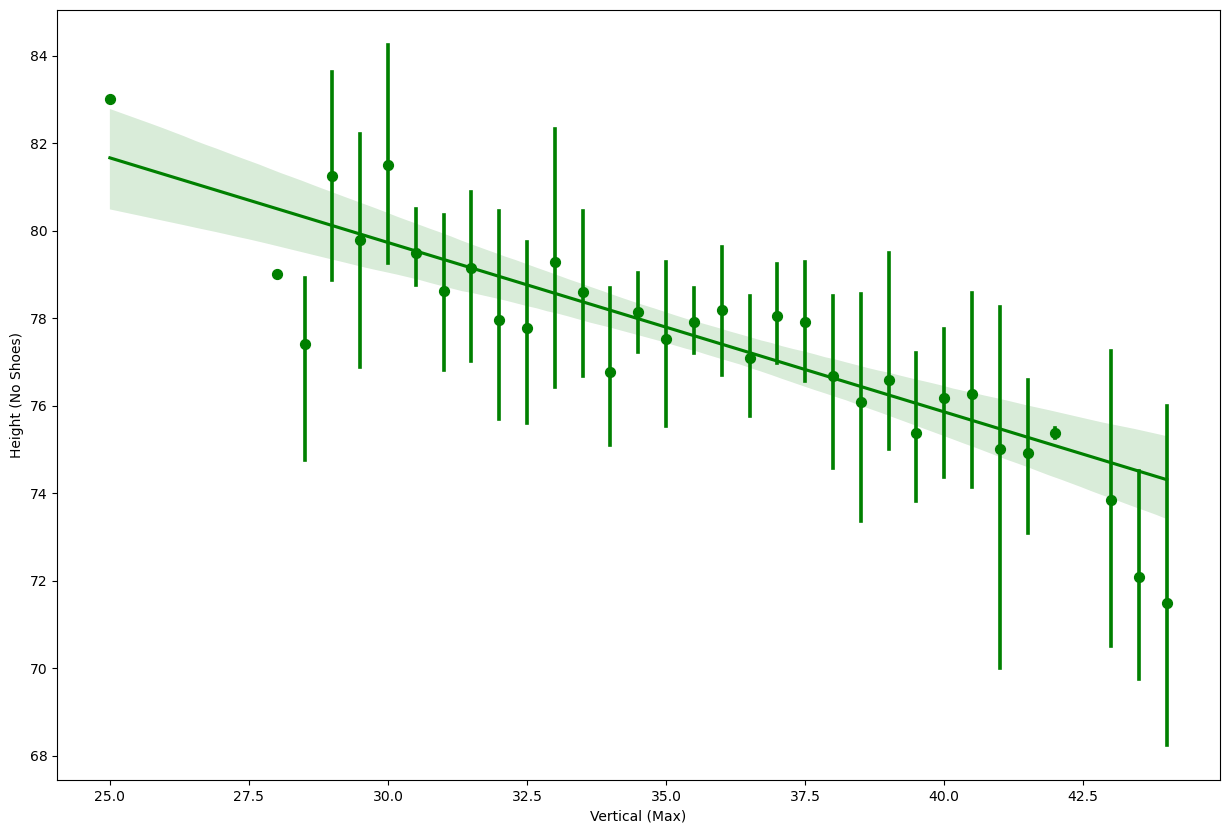

In [75]:
plt.figure(figsize=(15,10))
sns.regplot(x="Vertical (Max)", y= "Height (No Shoes)",data=nba,scatter=True, fit_reg=True,color="green",x_estimator=np.mean)

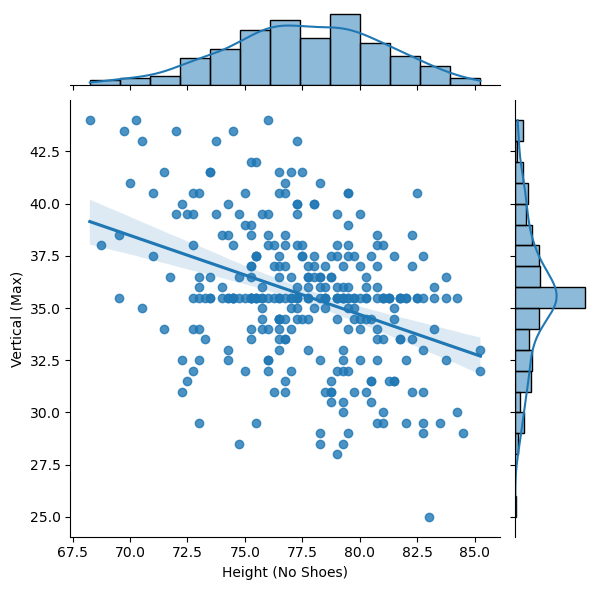

In [76]:

sns.jointplot(x="Height (No Shoes)", y="Vertical (Max)", data=new_df, kind="reg")

In [77]:
## Height having negative slope with veertical (max)
## two points data diverge fron the mean estimator
## Only one person having vertical max 25.0 is a outlier

# relation between vertical (max) and vertical(max reach)

<AxesSubplot:xlabel='Vertical (Max)', ylabel='Vertical (Max Reach)'>

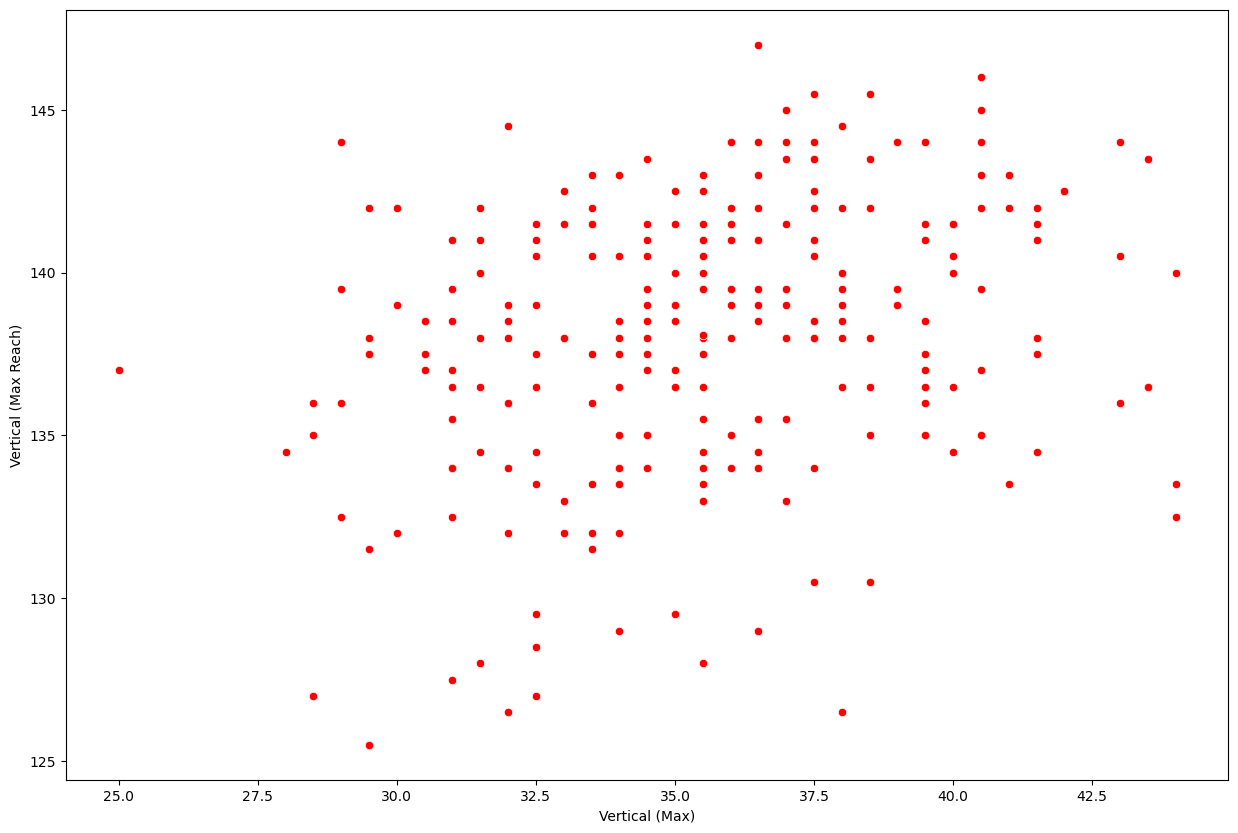

In [78]:

plt.figure(figsize=(15,10))
sns.scatterplot(x="Vertical (Max)",y="Vertical (Max Reach)",data=new_df,color="red")

In [79]:
## the above graph shows that only 1 person having vertical max with vertical max reach both
## most pf the person are in between 130- 245 vertical max reach

# Relation Between Hand (Length) and Hand (Width)

<AxesSubplot:xlabel='Hand (Length)', ylabel='Hand (Width)'>

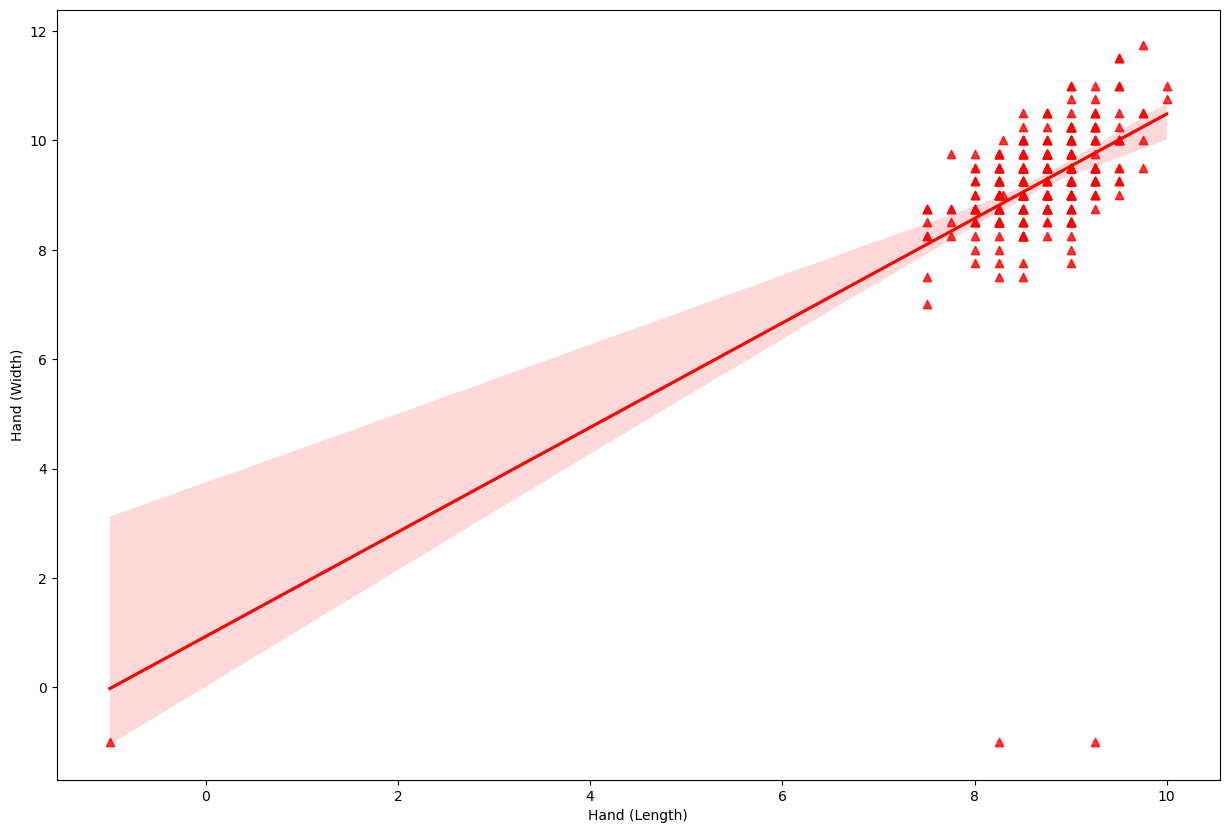

In [80]:
plt.figure(figsize=(15,10))
sns.regplot(x="Hand (Length)", y="Hand (Width)",data=new_df,fit_reg=True,scatter=True,color="red",marker="^")

In [81]:
## the hand length and width are linearly dependent on each other with intercept=7
## there are 2 outliers 


# Relation between WingSpan with Sum of Hand Width and Length

In [82]:
new_df.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Sprint'],
      dtype='object')

In [83]:
plt.figure(figsize=(15,10))
px.line(nba,x="Hand (Length)",y="Wingspan")

<Figure size 1500x1000 with 0 Axes>

In [84]:
## One person having Hand Length -1 which is not possible

In [85]:
plt.figure(figsize=(15,10))
px.line(nba,x="Hand (Width)",y="Wingspan")


<Figure size 1500x1000 with 0 Axes>

In [86]:
## There are 3 person havine hand Width -1 (NOT Possible)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dd578e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dd443970>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f3dd570cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dd46ca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dd581190>],
 'means': []}

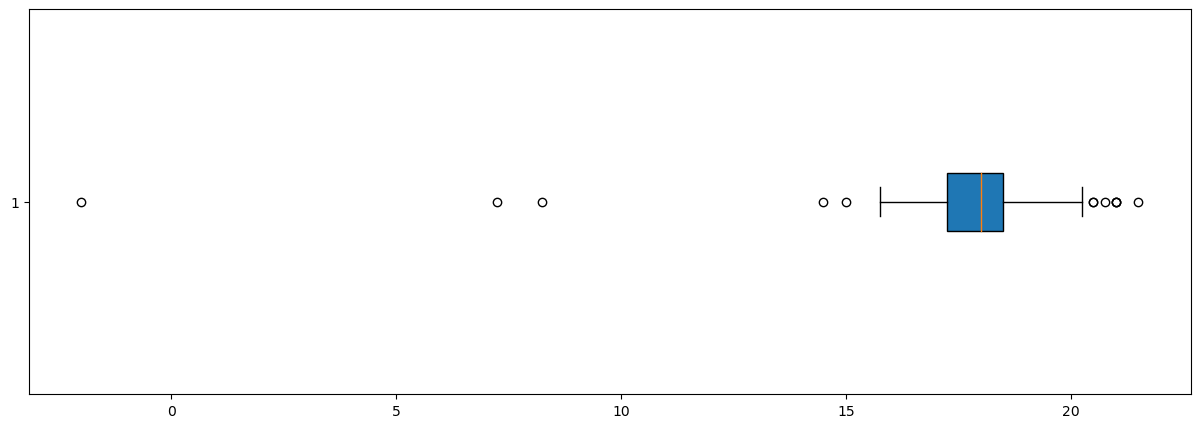

In [87]:
df1=nba["Hand (Length)"]+nba["Hand (Width)"]
plt.figure(figsize=(15,5))
plt.boxplot(df1,vert=False,patch_artist=True)

In [88]:
## There are Four cluster outliers 
## 3 below the lower extrem and 1 at upper extrem
## IQR is in between 15-20

# Weight with year

In [89]:
new_df.iplot(x="Year",y="Weight",theme="space",xTitle='year',
    yTitle='weights')

In [90]:
## weight decreses with year

# Body fat with years

In [91]:
new_df.iplot(x='Year',y='Body Fat',theme="space",xTitle='year',
    yTitle='body fat')

In [92]:
## Body Fat is Regularly decreases with years

# Analysing 3d Body Fat of players with years

In [93]:
new_df.iplot(x='Year',y='Body Fat',z="Player",theme="space",
             xTitle='year',
            
            yTitle='body fat',
            zTitle="Players",
            kind="scatter3d")

In [94]:
## The above Graph shows that a single  person in 2014  having maximum body Fat of  16.3 named 
## LaQuinton Ross

# Relation between Vertical Max hand( length ) and players

In [95]:
new_df.iplot(x='Vertical (Max)',y='Hand (Length)',z="Player",theme="space",
             xTitle='vertical max',
             yTitle='Hand (Length)',
             zTitle="Players",
             kind="scatter3d")


In [96]:
## A Player named kris dunn havine hand length -1 at vertical (max) of 35.5

In [97]:
new_df.iplot(x='Year',y='Sprint',z="Player",theme="space",
             xTitle='year',
             yTitle='sprint',
             zTitle="Players",
             kind="scatter3d")

In [98]:
## Sprint decreased with year increases

# 3D scatter plot of wingspan and standing reach of players

In [99]:
new_df.iplot(kind="scatter3d",x="Wingspan",y="Standing reach",z="Player",theme="space",colorscale="rdylbu",xTitle="Wingspan",
            yTitle="Standing reach",fill=True)


# surface plot of weight and body fat

In [100]:
new_df.iplot(kind="surface",x="Weight",y="Body Fat",z="Player",theme="space",colorscale="blues",xTitle="Weight",
            yTitle="Body Fat",zTitle="Player")

# Height With Body Fat

In [101]:
new_df.iplot(kind="surface",x="Height (No Shoes)",y="Body Fat",z="Player",theme="space",colorscale="rdylbu",xTitle="Height (No Shoes)",
            yTitle="Body Fat",zTitle="Player",fill=True)

# Spread Graph Between height vertical (max) and hand (length)

In [102]:
new_df[["Height (No Shoes)","Vertical (Max)", "Hand (Length)"]].iplot(kind="spread")

C:\Users\prath\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [103]:
## Hand (Length is almost Constant)
## Hand Length Decreased sudden between 250 -300

In [104]:
nba.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

In [105]:
fig = px.parallel_categories(new_df,color="Weight")

fig.show()

## It takes all those categories whose unique values is less than 50
## Below Graph shows that-

        ## the standing reach is maximum (115) in 2013 at 
                                # 1. Vertical (max)=29
                                # 2. Vertical (Max Reach)=144
                                # 3. vertical(No step) =25
                                # 4. Vertical (No step reach)= 140
                                # 5. hand(length)= 9.75
                                # 6. hand(width)=10

<AxesSubplot:ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

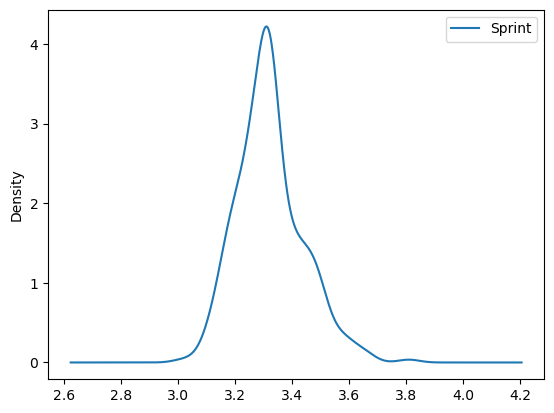

In [106]:
plt.figure(figsize=(15,10))
new_df.plot(kind="density",x="Year",y="Sprint")

In [107]:
fig = px.density_contour(new_df, x="Standing reach", y="Sprint",marginal_x="histogram", marginal_y="histogram")
# fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [108]:
## The Height is maximum at standing reach of 101 with sprint 3.325 and count of 16
## the probablity of finding  players is more at maximum height

# Violin Plot
# "Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"

In [109]:
fig = px.violin(new_df,y=["Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"],box=True,
               points="all")
fig.show()

In [110]:
##  the median value is somewhat same for Vertical (Max) and Vertical( No Step)
##  the median value is somewhat same for Vertical (Max Reach) and Vertical( No  Step reach)

# Hand (Width and Length)

In [111]:
fig = px.violin(new_df,y=["Hand (Length)","Hand (Width)"],box=False,
               points="all")
fig.show()

In [112]:
## 1 out liers for Both Hand Length and Width

# Empirical Commutative Distribution

In [113]:
fig = px.ecdf(new_df, x=["Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"])
fig.show()

In [114]:
## the probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.6 at value 30. 
## the probablity  of Vertical (Max ) changes suddenly from 0.37 to 0.59 at value 35.5. 
## the probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.5 at value 137. 
## the probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.6 at value 133.

###### most of the probablity of finding players is sudden changes at value of 30-25 and 130-140

In [115]:
fig = px.ecdf(new_df,x=["Hand (Length)","Hand (Width)"]
               )
fig.show()

In [116]:
## the probablity  of player is 0 until the value of Hand (Width) and Hand(Length) is not > 8 


In [117]:
new_df.iplot(kind="bar",x="Wingspan",y="Standing reach",subplots=True,
                  sortbars=True,theme="henanigans",xTitle ="Wingspan",yTitle="Standing reach")

In [118]:
##  Standing Reach is maximum at 82 wingspan

In [119]:
new_df.iplot(kind="line",x="Year",y=["Vertical (Max)","Vertical (No Step)","Vertical (No Step Reach)","Vertical (Max Reach)"],subplots=True,
                  sortbars=True,theme="henanigans",xTitle ="Year")


In [120]:
## every year all vertical (max ,max reach etc) are affect the players in same cost as one feature

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(new_df)

<Figure size 1500x1000 with 0 Axes>

In [ ]:
## as per pair plot the Values of Hand( Length ) And Hand(Width) are almost the same with  features

In [ ]:
new_df.iloc[:,1:].iplot(kind='heatmap')